In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore", category=FutureWarning)
import statsmodels.api as sm
     

In [31]:
pf = pd.read_csv("D:\\CodSoft\\Sales Prediction\\advertising.csv")


In [32]:
pf.head(15)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


Data Analysis   

In [33]:
pf.shape

(200, 4)

In [34]:
#To check null value within DATA SET
pf.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [35]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [36]:
#Exploring the data
pf.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [37]:
pf.isnull().sum()*100/pf.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

The Data Set is alredy cleaned

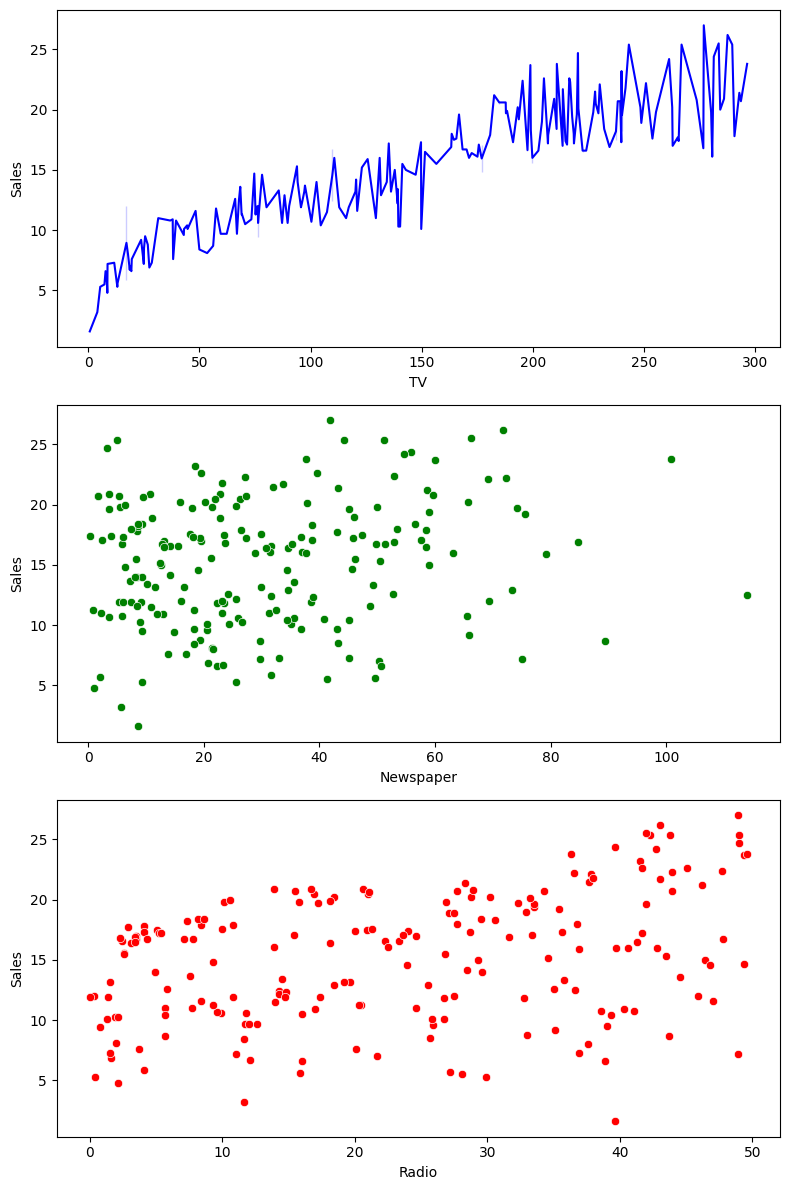

In [40]:
fig, axs = plt.subplots(3, figsize=(8, 12))

# Scatter plots
plt1 = sns.lineplot(x=pf['TV'], y=pf['Sales'], ax=axs[0], color='blue')
plt2 = sns.scatterplot(x=pf['Newspaper'], y=pf['Sales'], ax=axs[1], color='green')
plt3 = sns.scatterplot(x=pf['Radio'], y=pf['Sales'], ax=axs[2], color='red')

plt.tight_layout()
plt.show()



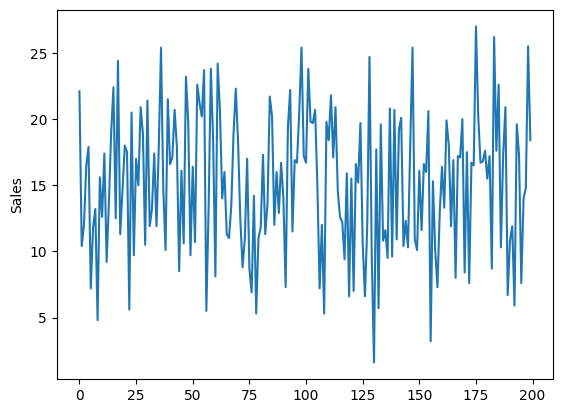

In [41]:
sns.lineplot(pf['Sales'])
plt.show()


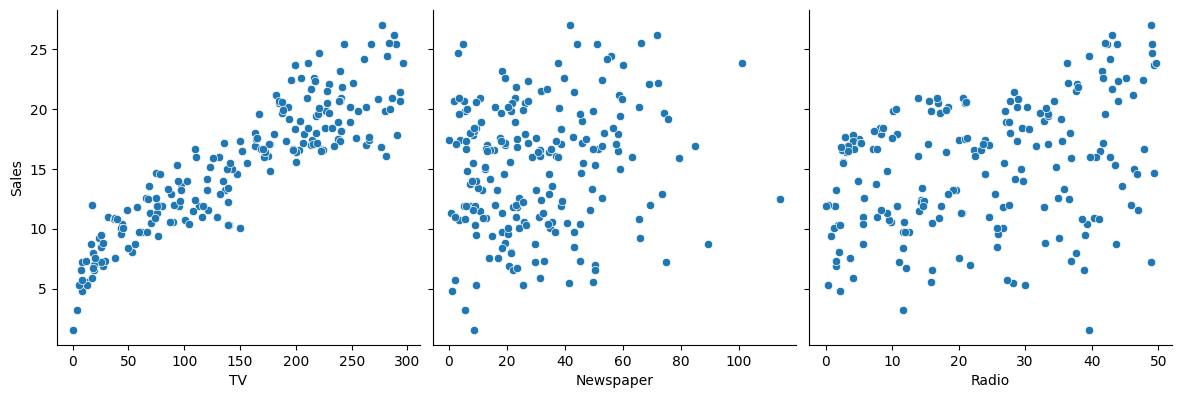

In [42]:
# Sales are related with other variables using scatter plot.
sns.pairplot(pf, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

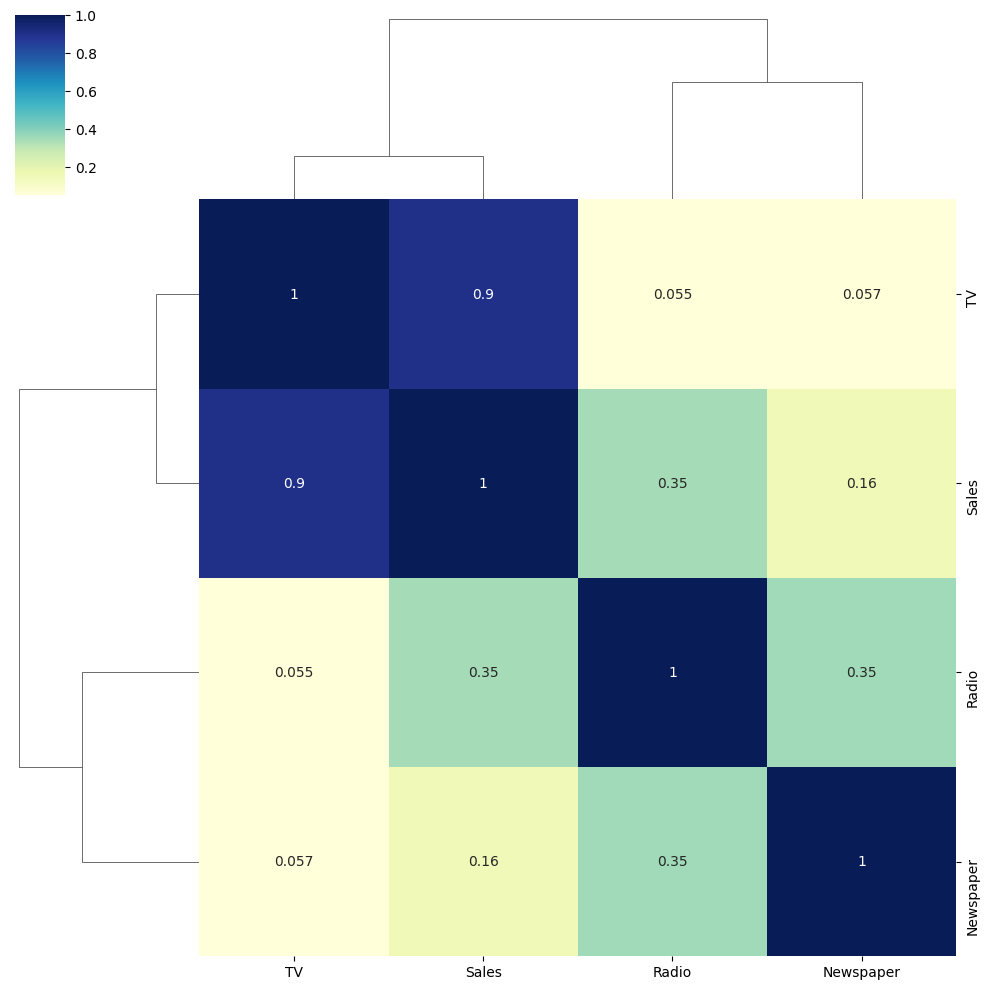

In [43]:
sns.clustermap(pf.corr(), cmap="YlGnBu", annot=True)
plt.show()

MDOEL BUILDING              

In [44]:
X = pf['TV']
y = pf['Sales']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
X_train.head()
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [46]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [47]:

# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        10:45:46   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

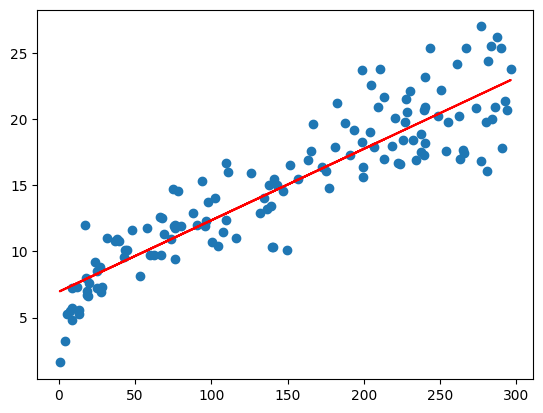

In [48]:

plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()
     

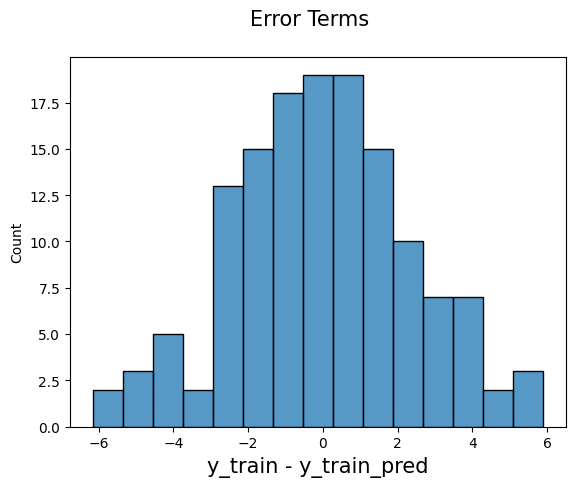

In [50]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)
fig = plt.figure()
sns.histplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

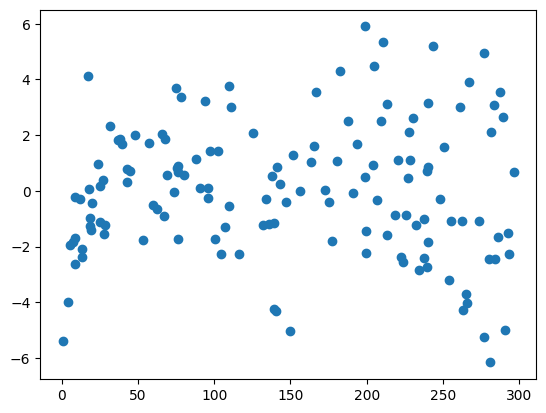

In [51]:

plt.scatter(X_train,res)
plt.show()

Prediction Outcomes based on predictions of TEST Set    d 

In [52]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [54]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

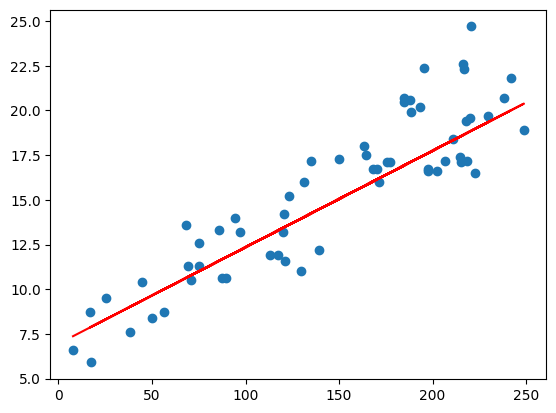

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()